##  Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Auto dataset - predicting the mileage of different vehicles
 The mileage can be estimated from the power of the engine and the characteristics of the vehicle.

 The model will predict the miles per gallon (mpg) of a vehicle based on
 * name - identifies a particular vehicle
 * cylinders - the number of cylinders (between four and eight)
 * displacement - the displacement(volume) of the engine in cubic inches
 * horsepower - the horsepower of the engine
 * acceleration the time it takes to accelerate from 0 to 60 mph (in
seconds)
 * orgin - the origin of the car

In [2]:
dataset = pd.read_csv('../content/Auto.csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
dataset.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
dataset=dataset.drop(columns=['name'])
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
dataset= dataset.apply(pd.to_numeric, errors='coerce')#it is only checking if errors is either raise or ignore, and otherwise coerce as a default.
dataset.fillna(0, inplace=True)#fill 0 in NaN
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


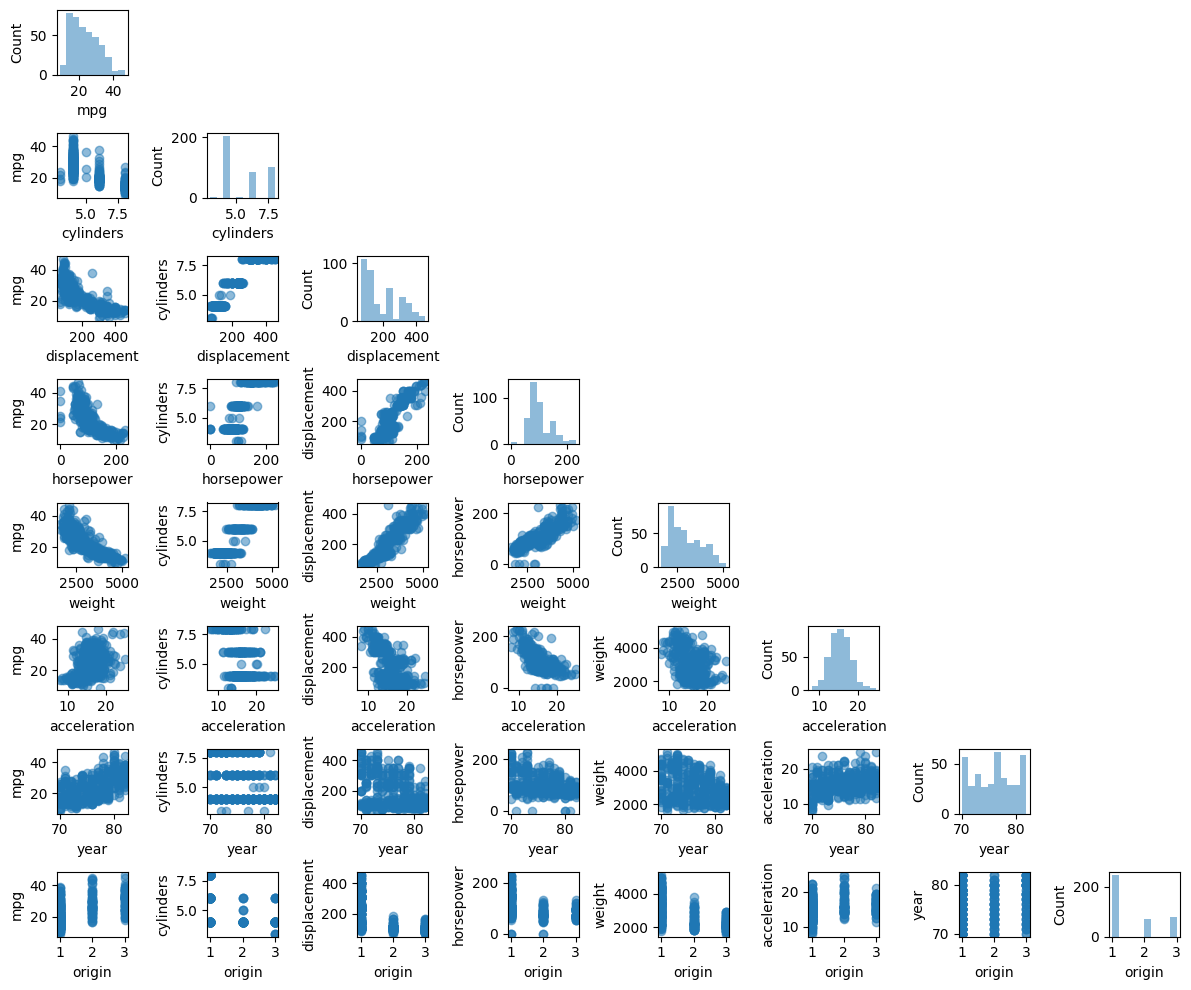

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(dataset.values, figsize=(12, 10),
                  names=dataset.columns, alpha=0.5)
plt.tight_layout()
plt.show()

In [8]:
y=dataset['mpg']
X=dataset.drop(columns=['mpg'])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [10]:
y.value_counts(normalize=True)

mpg
13.0    0.050378
14.0    0.047859
18.0    0.042821
15.0    0.040302
26.0    0.035264
          ...   
28.1    0.002519
24.2    0.002519
30.7    0.002519
22.4    0.002519
44.0    0.002519
Name: proportion, Length: 129, dtype: float64

In [ ]:
y.describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [12]:
y_test.describe()

count    120.000000
mean      23.381667
std        7.790567
min       11.000000
25%       17.000000
50%       22.500000
75%       29.000000
max       41.500000
Name: mpg, dtype: float64

# Feature Correlation
Yellobricks calculates Pearson correlation coefficients and mutual information between features and the dependent variable.

This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

## Pearson correlation
The default calculation is Pearson correlation, which is performed with scipy.stats.pearsonr.

In [13]:
dataset.values.T

array([[ 18. ,  15. ,  18. , ...,  32. ,  28. ,  31. ],
       [  8. ,   8. ,   8. , ...,   4. ,   4. ,   4. ],
       [307. , 350. , 318. , ..., 135. , 120. , 119. ],
       ...,
       [ 12. ,  11.5,  11. , ...,  11.6,  18.6,  19.4],
       [ 70. ,  70. ,  70. , ...,  82. ,  82. ,  82. ],
       [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ]])

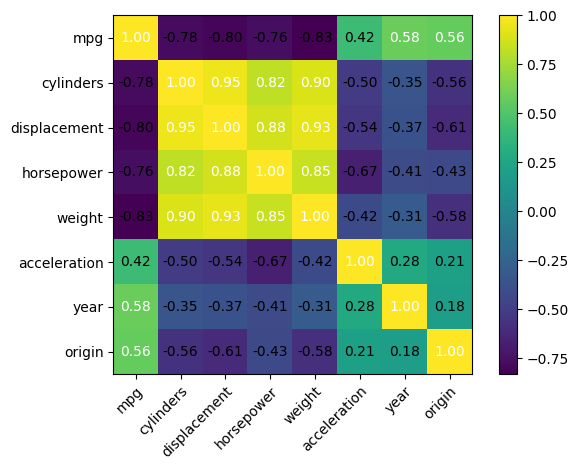

In [14]:
import numpy as np
from mlxtend.plotting import heatmap
cm = np.corrcoef(dataset.values.T)
hm = heatmap(cm, row_names=dataset.columns, column_names=dataset.columns)

plt.tight_layout()
plt.show()

In [15]:
features = X.columns
features

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

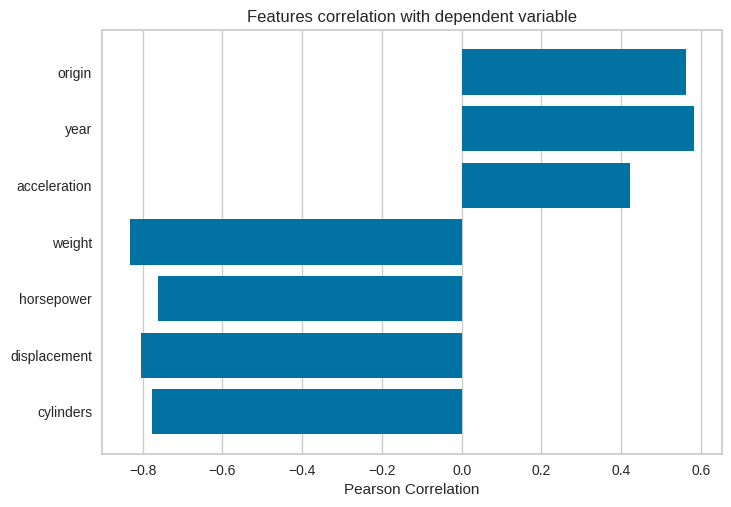

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [16]:
from yellowbrick.target import FeatureCorrelation

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

# Simple linear regresion

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
regressor.coef_

array([-0.36224492,  0.02097321, -0.01354792, -0.00708159,  0.08915291,
        0.79324364,  1.22471247])

In [19]:
regressor.intercept_

np.float64(-19.646410854686728)

In [20]:
y_pred = regressor.predict(X_test)

### Mean Absolute Error (MAE)
$$
MAE=\dfrac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|
$$

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.409283543435734

### Mean Squared Error (MSE)
$$
MSE=\dfrac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2
$$

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

9.900513827986822

### R-squared R2 Score
$$
R2=R^2=1-\dfrac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n (y_i-\bar{y})^2}
$$

The sum squared is the sum of the residuals squared, and the total sum of squares is the sum of the distance the data is away from the mean all squared. As it is a percentage it will take values between 0 and 1.

R function

r2 <- function(pred, actual) {

 rss = sum((actual - pred)^2) ## residual sum of squares

 tss = sum((actual - mean(actual)) ^ 2) ## total sum of squares

 result = 1 - rss / tss

 return(result)

}

**Interpretation of the R2**

Geometric interpretation:

The coefficient shows how well the regression line approximates the actual data.

![](../images/R2_1.jpeg)
![](../images/R2_88.jpeg)
![](../images/R2_0.jpeg)




In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8355045629618951

### Root Mean Squared Error (RMSE)
$$
RMSE
=\sqrt{\dfrac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

In [24]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

3.146508196078126

# Visualisation of regression

## Residuals Plot

The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


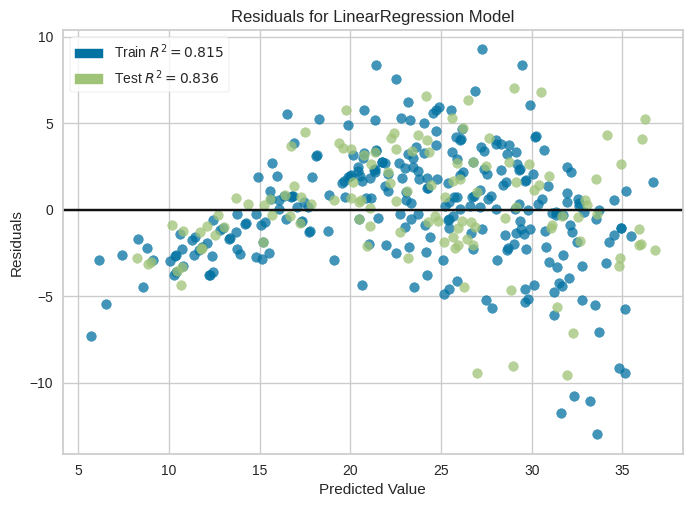

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor, hist=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

A histogram of the residuals distribution can be attached to the plot.

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


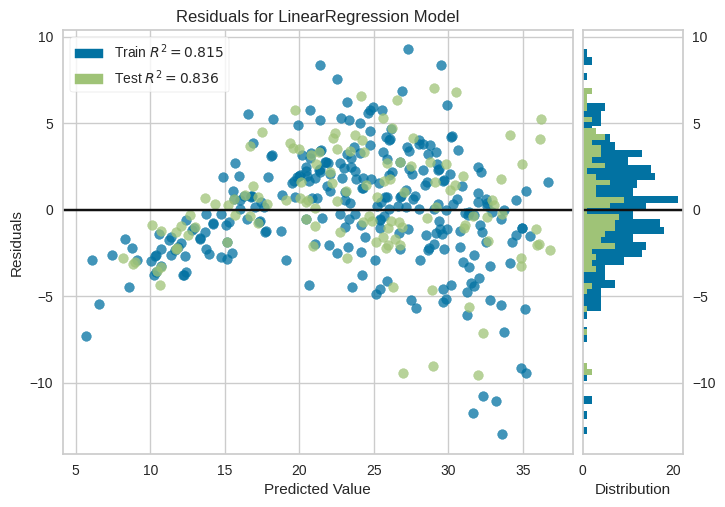

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
visualizer = ResidualsPlot(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


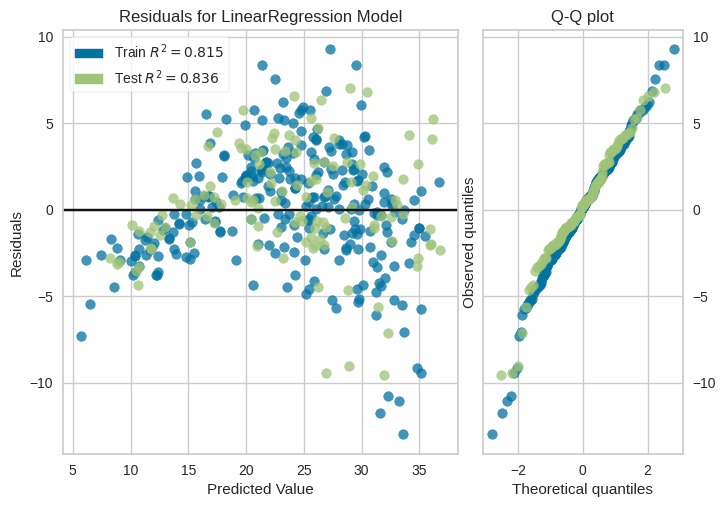

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [27]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor, hist=False, qqplot=True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

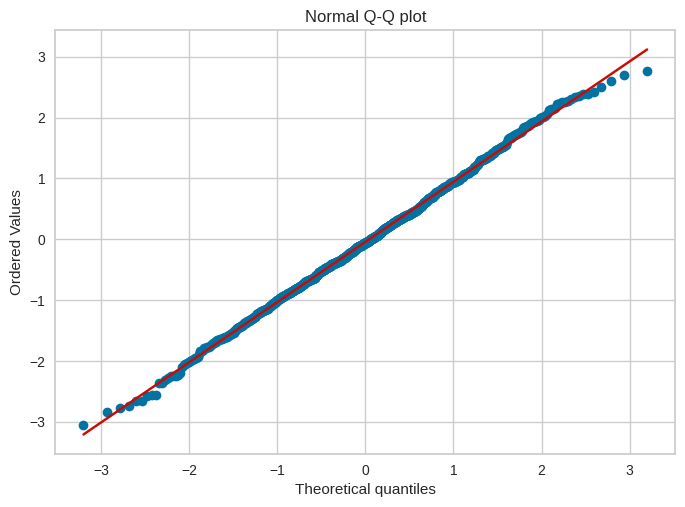

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate example data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

## Prediction Error Plot

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model.

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


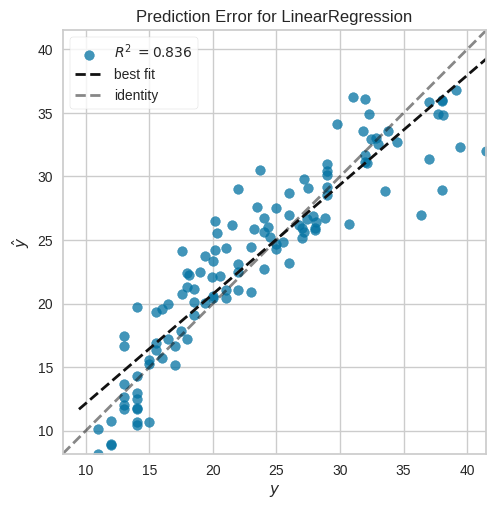

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [29]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()